In [87]:
import numpy as np
import tensorflow as tf

from aiwithtf.utils.viz import visualize_graph
from aiwithtf.utils import check_tf

check_tf(tf)

Using TensorFlow 1.4.0


### The Computation Graph

Output: 8


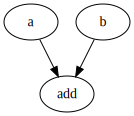

In [2]:
graph1 = tf.Graph()

with graph1.as_default():
    a = tf.constant(5, name='a')
    b = tf.constant(3, name='b')
    c = a + b
    
    with tf.Session() as sess:
        print('Output: {}'.format(sess.run(c)))
        
visualize_graph(graph1)

Output: [8 9]


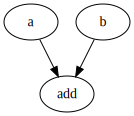

In [3]:
graph2 = tf.Graph()

with graph2.as_default():
    a = tf.constant([5, 2], name='a')
    b = tf.constant([3, 7], name='b')
    c = a + b
    
    with tf.Session() as sess:
        print('Output: {}'.format(sess.run(c)))
        
visualize_graph(graph2)

#### Interactive Session

In [4]:
sess = tf.InteractiveSession()

In [5]:
sess

In [6]:
x = tf.constant(5)
x.eval()

5

In [7]:
sess.close()

#### Placeholders

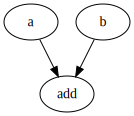

In [8]:
graph3 = tf.Graph()

with graph3.as_default():
    a = tf.placeholder(tf.int32, name='a')
    b = tf.placeholder(tf.int32, name='b')
    c = a + b
        
visualize_graph(graph3)

In [9]:
def run_graph(input_a, input_b, graph):
    with tf.Session(graph=graph) as sess:
        output = sess.run(c, feed_dict={a: input_a,
                                        b: input_b})
        return output

In [10]:
run_graph(1, 2, graph3)

3

In [11]:
run_graph([1, 2], [3, 4], graph3)

array([4, 6], dtype=int32)

In [12]:
matrix_a = np.array([[1, 2], [3, 4]])
matrix_b = np.array([[5, 6], [7, 8]])
run_graph(matrix_a, matrix_b, graph3)

array([[ 6,  8],
       [10, 12]], dtype=int32)

#### More operations

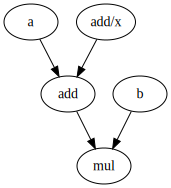

In [13]:
graph4 = tf.Graph()

with graph4.as_default():
    a = tf.placeholder(tf.int32, name='a')
    b = tf.placeholder(tf.int32, name='b')
    c = (1 + a) * b
        
visualize_graph(graph4)

In [14]:
run_graph(1, 2, graph4)

4

In [15]:
run_graph([1, 2], [3, 4], graph4)

array([ 6, 12], dtype=int32)

In [16]:
run_graph([[1, 2], [3, 4]], [[5, 6], [7, 8]], graph4)

array([[10, 18],
       [28, 40]], dtype=int32)

#### Variable

3


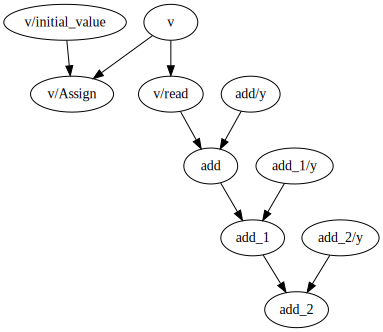

In [17]:
graph5 = tf.Graph()

with graph5.as_default():
    v = tf.Variable(0, name='v')
    
    with tf.Session() as sess:
        sess.run(v.initializer)
        for _ in range(3):
            v += 1
            
        print(sess.run(v))
    
visualize_graph(graph5)

### Perceptron

In [169]:
from tensorflow.python.framework import ops

In [195]:
class PerceptronWithTF:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    @staticmethod
    def _accuracy(labels, predictions):
        equal = tf.equal(tf.cast(labels, tf.float32), predictions)
        equal_float = tf.cast(equal, tf.float32)
        return tf.reduce_mean(equal_float)
    
    def fit(self, x, y):
        graph = tf.Graph()

        with graph.as_default():
            # w = tf.Variable(tf.random_normal([3, 1]), dtype=tf.float32)
            w = tf.Variable(tf.zeros([3, 1]), dtype=tf.float32)
            # x_ = np.hstack([x, np.ones([len(x), 1], dtype=np.float32)])
            x_ = np.c_[x, np.ones(len(x), dtype=np.float32)]
            # y_hat = tf.sign(tf.matmul(x_, w))
            y_hat = self._step(tf.matmul(x_, w))
            error = y - y_hat
            mse = tf.reduce_mean(tf.square(error))
            y_tensor = tf.convert_to_tensor(y)
            print(y_tensor.shape)
            print(y_hat.shape)
            print('=' * 10)
            # accuracy, acc_op = tf.metrics.accuracy(labels=y_tensor, predictions=y_hat)
            accuracy = self._accuracy(y_tensor, y_hat)
            delta = tf.matmul(x_, error, transpose_a=True)
            train = tf.assign(w, tf.add(w, self.learning_rate * delta))

        with tf.Session(graph=graph) as sess:
            init = tf.global_variables_initializer()
            # init_local = tf.local_variables_initializer()
            # sess.run([init, init_local])
            sess.run(init)

            for epoch in range(self.epochs):
                error_, w_, acc_, yh, yt = sess.run([mse, train, accuracy, y_hat, y_tensor])
                # error_, w_ = sess.run([mse, train])
                print('Epoch: {} MSE: {}, w: {}, acc: {}, yhat: {}'.format(epoch + 1,
                                                                 error_,
                                                                 w_.reshape(1, len(w_)),
                                                                 acc_, yh.reshape(1, len(w_) + 1)
                                                                ))

### OR

In [199]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
# y = np.array([[-1], [1], [1], [1]], dtype=np.float32)
y = np.array([[0], [1], [1], [1]], dtype=np.float32)

In [200]:
learning_rate = 0.1
epochs = 10

In [201]:
perceptron = PerceptronWithTF(learning_rate, epochs)
perceptron.fit(x, y)

(4, 1)
<unknown>
Epoch: 1 MSE: 0.75, w: [[ 0.2         0.2         0.30000001]], acc: 0.25, yhat: [[ 0.  0.  0.  0.]]
Epoch: 2 MSE: 0.25, w: [[ 0.2         0.2         0.20000002]], acc: 0.75, yhat: [[ 1.  1.  1.  1.]]
Epoch: 3 MSE: 0.25, w: [[ 0.2         0.2         0.10000002]], acc: 0.75, yhat: [[ 1.  1.  1.  1.]]
Epoch: 4 MSE: 0.25, w: [[  2.00000003e-01   2.00000003e-01   1.49011612e-08]], acc: 0.75, yhat: [[ 1.  1.  1.  1.]]
Epoch: 5 MSE: 0.25, w: [[ 0.2         0.2        -0.09999999]], acc: 0.75, yhat: [[ 1.  1.  1.  1.]]
Epoch: 6 MSE: 0.0, w: [[ 0.2         0.2        -0.09999999]], acc: 1.0, yhat: [[ 0.  1.  1.  1.]]
Epoch: 7 MSE: 0.0, w: [[ 0.2         0.2        -0.09999999]], acc: 1.0, yhat: [[ 0.  1.  1.  1.]]
Epoch: 8 MSE: 0.0, w: [[ 0.2         0.2        -0.09999999]], acc: 1.0, yhat: [[ 0.  1.  1.  1.]]
Epoch: 9 MSE: 0.0, w: [[ 0.2         0.2        -0.09999999]], acc: 1.0, yhat: [[ 0.  1.  1.  1.]]
Epoch: 10 MSE: 0.0, w: [[ 0.2         0.2        -0.09999999]], acc

### AND

In [204]:
# y = np.array([[-1], [-1], [-1], [1]], dtype=np.float32)
y = np.array([[0], [0], [0], [1]], dtype=np.float32)

In [205]:
perceptron = PerceptronWithTF(learning_rate, epochs)
perceptron.fit(x, y)

(4, 1)
<unknown>
Epoch: 1 MSE: 0.25, w: [[ 0.1  0.1  0.1]], acc: 0.75, yhat: [[ 0.  0.  0.  0.]]
Epoch: 2 MSE: 0.75, w: [[ 0.          0.         -0.20000002]], acc: 0.25, yhat: [[ 1.  1.  1.  1.]]
Epoch: 3 MSE: 0.25, w: [[ 0.1         0.1        -0.10000002]], acc: 0.75, yhat: [[ 0.  0.  0.  0.]]
Epoch: 4 MSE: 0.0, w: [[ 0.1         0.1        -0.10000002]], acc: 1.0, yhat: [[ 0.  0.  0.  1.]]
Epoch: 5 MSE: 0.0, w: [[ 0.1         0.1        -0.10000002]], acc: 1.0, yhat: [[ 0.  0.  0.  1.]]
Epoch: 6 MSE: 0.0, w: [[ 0.1         0.1        -0.10000002]], acc: 1.0, yhat: [[ 0.  0.  0.  1.]]
Epoch: 7 MSE: 0.0, w: [[ 0.1         0.1        -0.10000002]], acc: 1.0, yhat: [[ 0.  0.  0.  1.]]
Epoch: 8 MSE: 0.0, w: [[ 0.1         0.1        -0.10000002]], acc: 1.0, yhat: [[ 0.  0.  0.  1.]]
Epoch: 9 MSE: 0.0, w: [[ 0.1         0.1        -0.10000002]], acc: 1.0, yhat: [[ 0.  0.  0.  1.]]
Epoch: 10 MSE: 0.0, w: [[ 0.1         0.1        -0.10000002]], acc: 1.0, yhat: [[ 0.  0.  0.  1.]]


### Custom activation functions

In [ ]:
@staticmethod
def _step(x):
    def _step_actual(x):
        return 1 if x > 0 else 0

    np_step = np.vectorize(_step_actual)

    np_ = lambda x: np_step(x).astype(np.float32)
    with ops.op_scope([x], 'step', 'step') as name:
        y = tf.py_func(np_, [x], [tf.float32], name='step', stateful=False)
        return y[0]